# Autor: Filip Savić

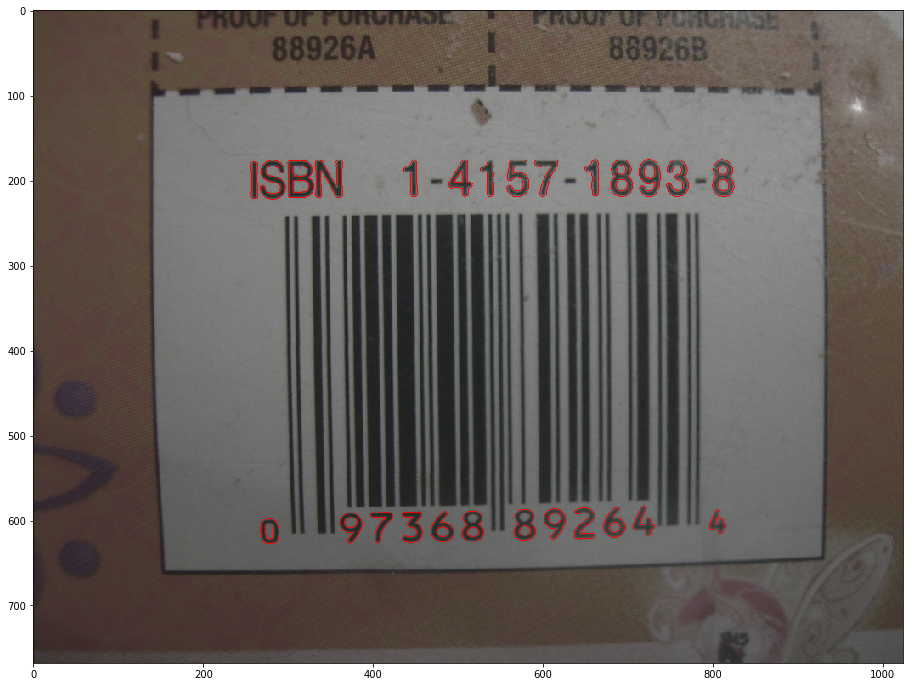

In [5]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

img_barcode = cv2.cvtColor(cv2.imread('../slike/barcode.jpg'), cv2.COLOR_BGR2RGB)

img_barcode_gs = cv2.cvtColor(img_barcode, cv2.COLOR_RGB2GRAY) # konvert u grayscale

image_barcode_bin = cv2.adaptiveThreshold(img_barcode_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
img, contours, hierarchy = cv2.findContours(image_barcode_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_barcode.copy()
contours_letters_nums = [] #ovde ce biti samo konture koje pripadaju bar-kodu
for contour in contours:
    x,y,width,height = cv2.boundingRect(contour) # x i y su koordinate gornjeg lijevog tjemena pravougaonika 
    if height > 10 and height < 100:
    # lijevi ili desni dio slike ili isprekidana horizont. ili isprekidana vertikalna linija ili gornji ili donji dio slike
        if x < 170 or x > 880 or (y > 60 and y < 150) or y < 150 or y > 650:
            continue
        contours_letters_nums.append(contour)


cv2.drawContours(img, contours_letters_nums, -1, (255, 0, 0), 1)
plt.imshow(img)